Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path

In [226]:
# Используем датасет с оценками приложений googleplaystore
file_for_process = '../L8_S8/googleplaystore.csv'
df_google = pd.read_csv('../L8_S8/googleplaystore.csv')
df_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [227]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [228]:
# Закодируем в число колонку датасета Content Rating, котора является на данный момент категориальной переменной.
# 6 категорий контента
df_google['Content Rating'].value_counts() # 34 категории

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [229]:
# Обработаем пропуски в колонке
df_google['Content Rating'].mode().values[0]
df_google.loc[df_google['Content Rating'].isna(), ['Content Rating']] = df_google['Content Rating'].mode().values[0]
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [230]:
#  Выделим категории и сохраним их в виде отдельного файла
# df_content_ratingd = pd.DataFrame({'Content Rating':df_google['Content Rating'].unique()}).dropna()
df_content_rating = pd.DataFrame({'Content Rating': df_google['Content Rating'].value_counts().index,
                                   'index': df_google['Content Rating'].value_counts().values} )
# df_content_ratingd.index = df_google['Content Rating'].value_counts().values
# df_content_ratingd.set_index('index')
df_content_rating.to_csv('./googleplaystore_content_rating.csv', index=False)

In [231]:
df_marks = pd.read_csv('./googleplaystore_content_rating.csv')
df_marks

,Content Rating,index
0,Everyone,8715
1,Teen,1208
2,Mature 17+,499
3,Everyone 10+,414
4,Adults only 18+,3
5,Unrated,2


In [232]:
# переведем наименование рейтингов в числовой признак
marks_as_dict = {df_marks.to_dict()['Content Rating'][i]:df_marks.to_dict()['index'][i] for i in range(df_marks.shape[0])}
marks_as_dict

{'Everyone': 8715,
 'Teen': 1208,
 'Mature 17+': 499,
 'Everyone 10+': 414,
 'Adults only 18+': 3,
 'Unrated': 2}

In [233]:
# Добавим поле для новой фичи в датасет
cri_col_name = 'Content Rating Index'
df_google[cri_col_name] = np.NAN

In [234]:
# разделим датасет на две части для автоматической (rule-based) и ручной разметки
df_google_auto, df_google_manual = train_test_split(df_google, train_size=df_google.shape[0] - 10, random_state=42)
df_google_manual.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating Index
3457,Microsoft Outlook,PRODUCTIVITY,4.3,3252896,50M,"100,000,000+",Free,0,Everyone,Productivity,"August 2, 2018",2.2.194,4.4 and up,NaN
3069,FotMob - Live Soccer Scores,SPORTS,4.7,410395,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 31, 2018",Varies with device,Varies with device,NaN
9657,EO Guide,HEALTH_AND_FITNESS,NaN,15,24M,"1,000+",Paid,$4.99,Everyone,Health & Fitness,"July 23, 2018",1.0.4,4.1 and up,NaN
10714,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,7.2M,"5,000,000+",Free,0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up,NaN
3963,Oral-B App,HEALTH_AND_FITNESS,3.3,14210,96M,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 19, 2018",6.0.1,5.0 and up,NaN


In [235]:
# Сохраним в файл часть датасета для ручной разметки.
file_for_process_manual = Path(file_for_process).stem + '_manual' + Path(file_for_process).suffix
print(file_for_process_manual)
file_processed_manual_with_marks = Path(file_for_process_manual).stem + '_processed' + Path(file_for_process_manual).suffix
print(file_processed_manual_with_marks)
df_google_manual.to_csv(file_for_process_manual, index=False)

googleplaystore_manual.csv
googleplaystore_manual_processed.csv


In [236]:
# Запустим ручную разметку. Код разметчика в файле DE_DC_AND_M_2023_l9_s9_HW.py
# python DE_DC_AND_M_2023_l9_s9_HW.py googleplaystore_manual.csv googleplaystore_content_rating.csv

In [237]:
df_google_manual_processed = pd.read_csv(file_processed_manual_with_marks)
df_google_manual_processed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating Index
0,Microsoft Outlook,PRODUCTIVITY,4.3,3252896,50M,"100,000,000+",Free,0,Everyone,Productivity,"August 2, 2018",2.2.194,4.4 and up,8715.0
1,FotMob - Live Soccer Scores,SPORTS,4.7,410395,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 31, 2018",Varies with device,Varies with device,1208.0
2,EO Guide,HEALTH_AND_FITNESS,NaN,15,24M,"1,000+",Paid,$4.99,Everyone,Health & Fitness,"July 23, 2018",1.0.4,4.1 and up,499.0
3,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,7.2M,"5,000,000+",Free,0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up,3.0
4,Oral-B App,HEALTH_AND_FITNESS,3.3,14210,96M,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 19, 2018",6.0.1,5.0 and up,2.0
5,EW Neuron Scan,TOOLS,NaN,1,6.5M,10+,Free,0,Everyone,Tools,"January 31, 2018",1.6.2,5.0 and up,414.0
6,Bg TV Online,FAMILY,2.3,50,2.8M,"10,000+",Free,0,Everyone,Entertainment,"October 21, 2017",1.2,4.1 and up,499.0
7,Bike Race Free - Top Motorcycle Racing Games,GAME,4.5,2586261,Varies with device,"100,000,000+",Free,0,Everyone,Racing,"July 31, 2018",7.7.9,4.2 and up,1208.0
8,BBVA Spain,FINANCE,4.2,36746,Varies with device,"5,000,000+",Free,0,Everyone,Finance,"July 24, 2018",Varies with device,Varies with device,8715.0
9,DT Smart,TOOLS,1.6,39,8.9M,"1,000+",Free,0,Everyone,Tools,"December 7, 2017",1.1.4,4.1 and up,499.0


In [238]:
# Промаркируем часть датасета на основе правил
df_google_auto[cri_col_name] = df_google_auto['Content Rating'].replace(marks_as_dict)
df_google_auto

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating Index
5802,The Vikings,GAME,4.4,15806,42M,"1,000,000+",Free,0,Teen,Arcade,"June 6, 2018",1.0.7,4.1 and up,1208
8862,ReadyOp DT,COMMUNICATION,4.6,8,1.1M,"1,000+",Free,0,Everyone,Communication,"July 6, 2018",1.0.56,2.3.3 and up,8715
4747,Telegram X,SOCIAL,4.6,70449,Varies with device,"5,000,000+",Free,0,Teen,Social,"July 27, 2018",Varies with device,Varies with device,1208
33,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up,8715
8612,DN Snacks,BUSINESS,NaN,0,7.6M,1+,Free,0,Everyone,Business,"April 9, 2018",1.0.0,4.0 and up,8715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Nougat Android 7 Launcher : AW,PERSONALIZATION,NaN,0,Varies with device,"100,000+",Free,0,Everyone,Personalization,"March 17, 2017",Varies with device,Varies with device,8715
5191,Extreme- Personal Voice Assistant,PRODUCTIVITY,4.4,25627,9.8M,"1,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",132,5.0 and up,8715
5390,Create apps fast with beautiful design and no ...,BUSINESS,3.7,23729,24M,"1,000,000+",Free,0,Everyone,Business,"May 14, 2018",7.2,4.4 and up,8715
860,Mobile TV,ENTERTAINMENT,3.5,10939,4.6M,"10,000,000+",Free,0,Everyone,Entertainment,"April 28, 2016",2.05.0010,5.0 and up,8715


In [239]:
# Выполним объединение датасета промаркированного вручную и промаркированного на основе правил.
df_google_processed = pd.concat([df_google_manual_processed, df_google_auto], axis=0, ignore_index=True, sort=False)
df_google_processed.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating Index
0,Microsoft Outlook,PRODUCTIVITY,4.3,3252896,50M,"100,000,000+",Free,0,Everyone,Productivity,"August 2, 2018",2.2.194,4.4 and up,8715.0
1,FotMob - Live Soccer Scores,SPORTS,4.7,410395,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 31, 2018",Varies with device,Varies with device,1208.0
2,EO Guide,HEALTH_AND_FITNESS,NaN,15,24M,"1,000+",Paid,$4.99,Everyone,Health & Fitness,"July 23, 2018",1.0.4,4.1 and up,499.0
3,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,7.2M,"5,000,000+",Free,0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up,3.0
4,Oral-B App,HEALTH_AND_FITNESS,3.3,14210,96M,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 19, 2018",6.0.1,5.0 and up,2.0


In [240]:
# marks_as_dict_1 = {el[1]:el[0] for el in df_content_rating['Content Rating'].to_dict().items()}
# marks_as_dict_1

In [241]:
# df_google_processed[cri_col_name] = df_google_processed['Content Rating'].replace(marks_as_dict_1)

In [242]:
# Выполним разметку с помощью машинного обучения: определим Content Rating Index по наименованию приложения
# разделим датасет на тестовую и обучающую выборки 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import f1_score, r2_score, confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as  plt 
import seaborn as sns

In [243]:
# df_google_processed = 
df = shuffle(df_google_processed)[['App', cri_col_name]]
df_labeled, df_unlabeled = train_test_split(df, train_size=0.2, random_state=15)
print(df_labeled)
print(df_unlabeled)


                                    App  Content Rating Index
5218     Alarm Clock: Stopwatch & Timer                8715.0
1511                        Cool Reader                8715.0
5384     FC Barcelona Official Keyboard                8715.0
3198                           Br Shafi                8715.0
4741        Texas Hold'em EV Calculator                8715.0
...                                 ...                   ...
6492                 FK Viktoria Žižkov                8715.0
7751                ZOOM Cloud Meetings                8715.0
4483   Zoo For Preschool Kids 3-9 Years                8715.0
1083               My College Bookstore                8715.0
10196          Google Handwriting Input                8715.0

[2168 rows x 2 columns]
                                App  Content Rating Index
6870                    Doctor Kids                8715.0
2391                HD Video Player                8715.0
10585                     CD Roma's                8715.0

In [244]:
# df_unlabeled_y = df_unlabeled[cri_col_name]
# df_unlabeled.drop(columns=[cri_col_name], inplace=True)
# print(df_unlabeled_y.head(3))
# print(df_unlabeled.head(3))

In [245]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_labeled['App'])
# model = LinearRegression()
# model = LogisticRegression()
# model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
model = RandomForestClassifier(n_estimators=100)
model.fit(X, df_labeled[cri_col_name])

RandomForestClassifier()

In [246]:
X_unlabeled = vectorizer.transform(df_unlabeled['App'])
df_unlabeled_y_pred = model.predict(X_unlabeled)

In [247]:
# df_unlabeled
# X_unlabeled
# print(df_unlabeled_y)
# print(type(df_unlabeled_y_pred))
# print(type(df_unlabeled[cri_col_name].values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [253]:
df_unlabeled_y_pred 

array([8715., 8715., 8715., ..., 8715., 1208., 8715.])

In [255]:
r2_score(df_unlabeled[cri_col_name], df_unlabeled_y_pred)

0.0488785900365879

<Axes: >

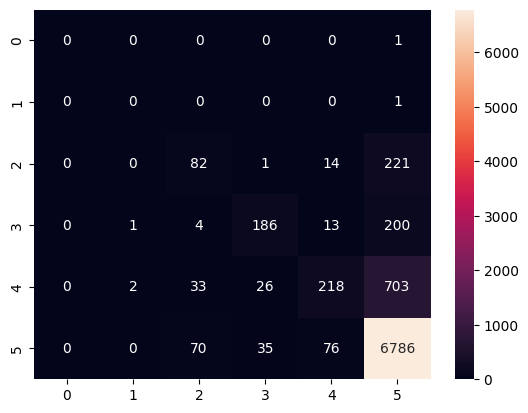

In [252]:
cmm = confusion_matrix(df_unlabeled[cri_col_name].values, df_unlabeled_y_pred)
ax = plt.subplot()
sns.heatmap(cmm, annot=True, fmt='g', ax=ax)

In [ ]:
# Точность модели очень низкая, т.к. длины признака - "Наименование приложение" недостаточно для прогнозирования рейтинга приложения.
# Данный признак был использован исключительно в обучающих целях.